# Setup

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact,   interact_manual


# References

## Numpy
In OpenCV images are represented as native Numpy arrays: vectors,   matrices,   and tensors. Here are some useful links to 
Numpy array operations
- Indexing https://numpy.org/devdocs/user/basics.indexing.html
- Broadcasting https://numpy.org/devdocs/user/basics.broadcasting.html

## OpenCV Tutorials

- Python tutorial: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_root.html
- Alternative site: https://docs.opencv.org/master/d6/d00/tutorial_py_root.html


## Topics for this Notebook

- **Image Thresholding**,   convert images to binary images using global thresholding,   Adaptive thresholding,   Otsu’s binarization etc [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_thresholding.html#doxid-d7-d4d-tutorial-py-thresholding)
- **Smoothing Images**,   blur the images,   filter the images with custom kernels 
[Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_filtering.html#doxid-d4-d13-tutorial-py-filtering)
- **Morphological Transformations**,   morphological transformations like Erosion,   Dilation,   Opening,   Closing
[Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_morphological_ops.html#doxid-d9-d61-tutorial-py-morphological-ops)
- **Image Gradients**,   find image gradients,   edges [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_gradients.html#doxid-d5-d0f-tutorial-py-gradients)
- **Canny Edge Detection**,   find edges with Canny Edge Detection [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_canny.html#doxid-da-d22-tutorial-py-canny)
- **Contours in OpenCV** [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_table_of_contents_contours.html#doxid-d3-d05-tutorial-py-table-of-contents-contours)
- **Hough Line Transform**,   detect lines in an image [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghlines.html#doxid-d6-d10-tutorial-py-houghlines)
- **Hough Circle Transform**,   detect circles in an image [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghcircles.html#doxid-da-d53-tutorial-py-houghcircles)


# Convolution

A number of image processing operations can be performed using convolution kernels. OpenCV provides functions for the most common operations that create the kernel based on given parameters. However,   we can also define convolution kernels from scratch and apply them with `cv2.filter2D()`

**Usage:**

`filter2D(src,   ddepth,   kernel[,   dst[,   anchor[,   delta[,   borderType]]]]) -> dst`

The function applies an arbitrary linear filter to an image. In-place operation is supported. When
the aperture is partially outside the image,   the function interpolates outlier pixel values
according to the specified border mode.

The function does actually compute correlation,   not the convolution:

$\texttt{dst} (x,  y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',  y')* \texttt{src} (x+x'- \texttt{anchor.x} ,  y+y'- \texttt{anchor.y} )$

That is,   the kernel is not mirrored around the anchor point. If you need a real convolution,   flip
the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1,   kernel.rows -
anchor.y - 1)`.

The function uses the DFT-based algorithm in case of sufficiently large kernels (~`11 x 11` or
larger) and the direct algorithm for small kernels.

**Parameters:**

- `src` input image.
- `dst` output image of the same size and the same number of channels as src.
- `ddepth` desired depth of the destination image,   see @ref filter_depths "combinations"
- `kernel` convolution kernel (or rather a correlation kernel),   a single-channel floating point matrix; if you want to apply different kernels to different channels,   split the image into separate color planes using split and process them individually.
- `anchor` anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,  -1) means that the anchor is at the kernel center.
- `delta` optional value added to the filtered pixels before storing them in dst.
- `borderType` pixel extrapolation method,   see #BorderTypes. #BORDER_WRAP is not supported.

**See also:** `sepFilter2D`,   `dft`,   `matchTemplate`

(220, 290)


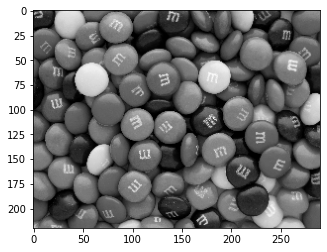

In [2]:
sudoku = cv2.cvtColor(cv2.resize(cv2.imread('images/Plain-MnMs-Pile.jpg'),   (290,   220)),   cv2.COLOR_BGR2GRAY)
print(sudoku.shape)
plt.imshow(sudoku,   cmap='gray')

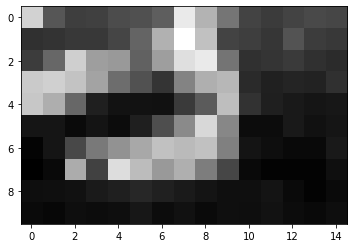

In [3]:
plt.imshow(sudoku[:10,   :15],   cmap='gray')

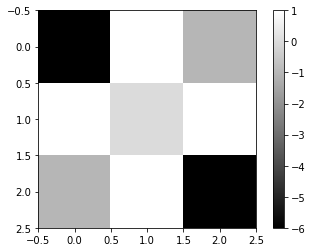

In [7]:
filt = np.array([[-6,   1,   -1],  
                 [ 1,   0,    1],  
                 [-1,   1,   -6]]
               )
filt_sum = filt.sum()
if filt_sum>1:
    filt = filt / filt_sum
plt.imshow(filt,   cmap='gray')
plt.colorbar()

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

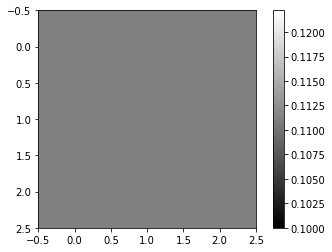

In [11]:
filt2 = np.array([[ 1,   1,   1],  
                 [ 1,   1,   1],  
                 [ 1,   1,   1]]
               )
filt_sum2 = filt2.sum()
if filt_sum2>1:
    filt2 = filt2 / filt_sum2
plt.imshow(filt2,   cmap='gray')
plt.colorbar()
filt2

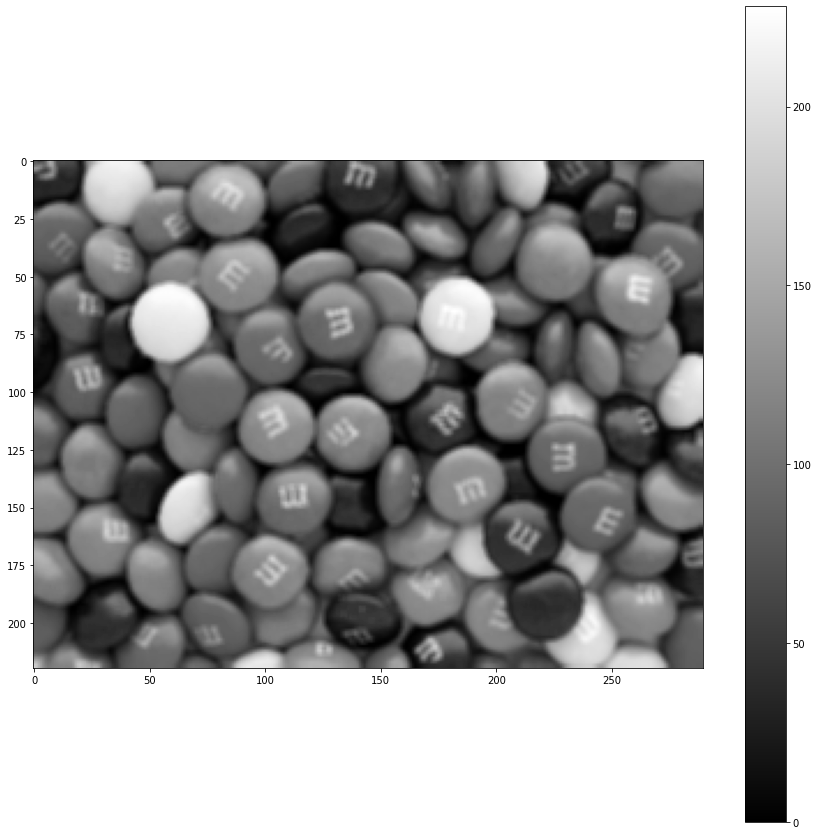

In [12]:
conv = cv2.filter2D(sudoku,   -1,   filt2)
plt.figure(figsize=(15,15))
plt.imshow(conv,   cmap='gray')
plt.colorbar()
plt.show(); plt.close()

# Image Thresholding
convert images to binary images using global thresholding,   Adaptive thresholding,   Otsu’s binarization etc

[Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_thresholding.html#doxid-d7-d4d-tutorial-py-thresholding)


```
    threshold(src,  thresh,  maxval,  type[,  dst]) -> retval,  dst
```
The function applies fixed-level thresholding to a multiple-channel array. The function is typically
used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
this purpose) or for removing a noise,  that is,  filtering out pixels with too small or too large
values. There are several types of thresholding supported by the function. They are determined by
type parameter.

Also,  the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
above values. In these cases,  the function determines the optimal threshold value using the Otsu's
or Triangle algorithm and uses it instead of the specified thresh.

**Note:** Currently,  the Otsu's and Triangle methods are implemented only for 8-bit single-channel images.

- `src` input array (multiple-channel,  8-bit or 32-bit floating point).
- `dst` output array of the same size  and type and the same number of channels as src.
- `thresh` threshold value.
- `maxval` maximum value to use with the #THRESH_BINARY and #THRESH_BINARY_INV thresholding types.
- `type` thresholding type (see #ThresholdTypes).

**Returns:** return the computed threshold value if Otsu's or Triangle methods used.

**See also:** adaptiveThreshold,  findContours,  compare,  min,  max

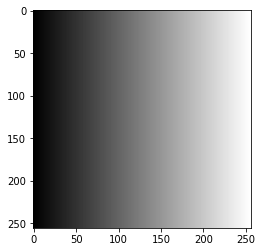

In [15]:
gradient = np.uint8(np.zeros((256,   256),   np.uint8) + np.array(range(256)))
#          ^create matrix w/ zeros        ^use broadcast add     
plt.imshow(gradient,   cmap='gray')

In [16]:
@interact
def show_threshold(
        th_low=widgets.IntSlider(value=127,   min=0,   max=255)):
    print(f"Threshold: {th_low}")
    ret,  thresh1 = cv2.threshold(gradient,  th_low,  255,  cv2.THRESH_BINARY)
    ret,  thresh2 = cv2.threshold(gradient,  th_low,  255,  cv2.THRESH_BINARY_INV)
    ret,  thresh3 = cv2.threshold(gradient,  th_low,  255,  cv2.THRESH_TRUNC)
    ret,  thresh4 = cv2.threshold(gradient,  th_low,  255,  cv2.THRESH_TOZERO)
    ret,  thresh5 = cv2.threshold(gradient,  th_low,  255,  cv2.THRESH_TOZERO_INV)

    titles = ['Original Image',  'BINARY',  'BINARY_INV',  'TRUNC',  'TOZERO',  'TOZERO_INV']
    images = [gradient,   thresh1,   thresh2,   thresh3,   thresh4,   thresh5]

    plt.figure(figsize=(15,  10))
    for i in range(6):
        plt.subplot(2,  3,  i+1)
        plt.imshow(images[i],  'gray',  vmin=0,  vmax=255)
        plt.colorbar()
        plt.title(titles[i])
        plt.xticks([]),  plt.yticks([])

    plt.show()

interactive(children=(IntSlider(value=127, description='th_low', max=255), Output()), _dom_classes=('widget-in…

In [24]:
! mv sudoku-original.jpg images/

In [26]:
.shape

(423, 419, 3)

## Adaptive Thresholding

In the previous section,  we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case,  we go for adaptive thresholding. In this,  the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

Adaptive Method - It decides how thresholding value is calculated.

`cv2.ADAPTIVE_THRESH_MEAN_C` : threshold value is the mean of neighbourhood area.

`cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
Block Size - It decides the size of neighbourhood area.

`C` - It is just a constant which is subtracted from the mean or weighted mean calculated.

In [17]:
# load image,  with flag zero the image loads as grayscale
sudoku_1 = cv2.imread('images/sudoku-original.jpg',  0)
print(sudoku_1.shape)

(423, 419)


In [18]:
@interact_manual
def show_adaptive_threshold(
    blur = widgets.SelectionSlider(options=[2*j+1 for j in range(1, 11)],  value=5), 
    th_low = widgets.IntSlider(value=127,   min=0,   max=255), 
    block_size = widgets.SelectionSlider(options=[2*j+1 for j in range(1, 25)],  value=5)):

    sudoku = cv2.medianBlur(sudoku_1,  blur)

    ret, th1 = cv2.threshold(sudoku,  th_low,  255, cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(sudoku,  th_low,  cv2.ADAPTIVE_THRESH_MEAN_C, \
                cv2.THRESH_BINARY,  block_size,  2)
    th3 = cv2.adaptiveThreshold(sudoku, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                cv2.THRESH_BINARY,  block_size,  2)

    titles = [f'Original Image',  'Global Thresholding (v = {th_low})', 
                'Adaptive Mean Thresholding',  'Adaptive Gaussian Thresholding']
    images = [sudoku,  th1,  th2,  th3]

    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()
    plt.close()

interactive(children=(SelectionSlider(description='blur', index=1, options=(3, 5, 7, 9, 11, 13, 15, 17, 19, 21…

## Otsu’s Binarization

In the first section,  I told you there is a second parameter retVal. Its use comes when we go for Otsu’s Binarization. So what is it?

In global thresholding,  we used an arbitrary value for threshold value,  right? So,  how can we know a value we selected is good or not? Answer is,  trial and error method. But consider a bimodal image (In simple words,  bimodal image is an image whose histogram has two peaks). For that image,  we can approximately take a value in the middle of those peaks as threshold value,  right ? That is what Otsu binarization does. So in simple words,  it automatically calculates a threshold value from image histogram for a bimodal image. (For images which are not bimodal,  binarization won’t be accurate.)

For this,  our `cv2.threshold()` function is used,  but pass an extra flag,  cv2.THRESH_OTSU. For threshold value,  simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output,  retVal. If Otsu thresholding is not used,  retVal is same as the threshold value you used.

Check out below example. Input image is a noisy image. In first case,  I applied global thresholding for a value of 127. In second case,  I applied Otsu’s thresholding directly. In third case,  I filtered image with a 5x5 gaussian kernel to remove the noise,  then applied Otsu thresholding. See how noise filtering improves the result.

In [51]:
np.random.normal(loc=30, scale=5, size=(200, 320))

array([[31.24829205, 28.28675958, 36.63553354, ..., 28.38570391,
        27.84389967, 26.91438754],
       [24.50990358, 31.54854601, 38.05761857, ..., 30.03521581,
        29.3695527 , 30.13446948],
       [31.63113319, 37.96275413, 25.12569623, ..., 32.07806837,
        16.77057024, 32.02813596],
       ...,
       [20.18091007, 30.14524703, 30.70420197, ..., 29.19086011,
        35.21088753, 36.77438606],
       [32.59952304, 26.56659661, 34.87966832, ..., 33.6338986 ,
        22.45876785, 36.60634228],
       [22.75049826, 29.15361649, 29.80176263, ..., 31.35384988,
        23.9788319 , 32.011887  ]])

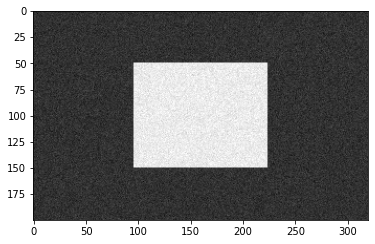

In [19]:
def create_noisy_image(mu, sigma, size, method='gauss'):
    if method=='gauss':
        rndnoise = np.random.normal(loc=mu, scale=sigma, size=size)
    else:
        rndnoise = np.uint8(np.random.randint(0,  mu,  size))
    rect = np.uint8(np.zeros(size))
    rect[int(size[0]*.25):int(size[0]*.75),  int(size[1]*.30):int(size[1]*.70)] = 255-(mu+2*sigma)
    noisy = rndnoise + rect
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return np.uint8(noisy)

plt.imshow(create_noisy_image(50, 10, (200, 320)),  cmap='gray',  vmin=0,  vmax=255)

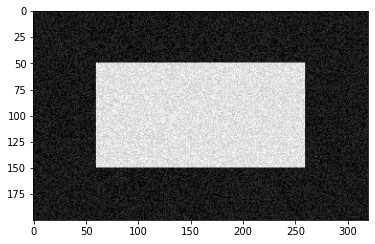

In [49]:
# Create a noisy image using a random noise layer,  and a rectangle

rndnoise = np.uint8(np.random.randint(0,  50,  (200,  320)))
# plt.imshow(rndnoisy,  cmap='gray',  vmin=0,  vmax=255)

rect = np.uint8(np.zeros((200,  320)))
rect[50:150,  60:260] = 200
# plt.imshow(m1,  cmap='gray',  vmin=0,  vmax=255)

noisy = rndnoise + rect

plt.imshow(noisy,  cmap='gray',  vmin=0,  vmax=255)

In [20]:
@interact_manual
def show_otsu(
        noise_mu = widgets.IntSlider(value=100, min=0, max=200),
        noise_sigma = widgets.IntSlider(value=50, min=0, max=200),
        blur = widgets.SelectionSlider(options=[2*j+1 for j in range(1, 11)],  value=5), 
        th_low = widgets.IntSlider(value=127,   min=0,   max=255)):

    # Create a noisy image using a random noise layer,  and a rectangle
    noisy = create_noisy_image(noise_mu, noise_sigma, (200, 320))
    
    # global thresholding
    ret1, th1 = cv2.threshold(noisy, th_low, 255, cv2.THRESH_BINARY)

    # Otsu's thresholding
    ret2, th2 = cv2.threshold(noisy, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(noisy, (blur, blur), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # plot all the images and their histograms
    images = [noisy,  0,  th1, 
              noisy,  0,  th2, 
              blur,  0,  th3]
    titles = ['Original Noisy Image', 'Histogram', f'Global Thresholding (v={th_low})', 
              'Original Noisy Image', 'Histogram', "Otsu's Thresholding", 
              'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

    plt.figure(figsize=(15, 12))
    for i in range(3):
        plt.subplot(3, 3, i*3+1), plt.imshow(images[i*3], 'gray')
        plt.title(titles[i*3]),  plt.xticks([]),  plt.yticks([])
        plt.subplot(3, 3, i*3+2), plt.hist(images[i*3].ravel(), 256)
        plt.title(titles[i*3+1]),  plt.xticks([]),  plt.yticks([])
        plt.subplot(3, 3, i*3+3), plt.imshow(images[i*3+2], 'gray')
        plt.title(titles[i*3+2]),  plt.xticks([]),  plt.yticks([])
    plt.show()
    plt.close()

interactive(children=(IntSlider(value=100, description='noise_mu', max=200), IntSlider(value=50, description='…

# Smoothing Images
blur the images,   filter the images with custom kernels 

[Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_filtering.html#doxid-d4-d13-tutorial-py-filtering)


Image Blurring (Image Smoothing) is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation. (Well, there are blurring techniques which doesn’t blur the edges too). OpenCV provides mainly four types of blurring techniques.

Create your own convolutional filter or use one of the implemented functions:

In [13]:
help(cv2.blur)

Help on built-in function blur:

blur(...)
    blur(src, ksize[, dst[, anchor[, borderType]]]) -> dst
    .   @brief Blurs an image using the normalized box filter.
    .   
    .   The function smooths an image using the kernel:
    .   
    .   \f[\texttt{K} =  \frac{1}{\texttt{ksize.width*ksize.height}} \begin{bmatrix} 1 & 1 & 1 &  \cdots & 1 & 1  \\ 1 & 1 & 1 &  \cdots & 1 & 1  \\ \hdotsfor{6} \\ 1 & 1 & 1 &  \cdots & 1 & 1  \\ \end{bmatrix}\f]
    .   
    .   The call `blur(src, dst, ksize, anchor, borderType)` is equivalent to `boxFilter(src, dst, src.type(), ksize,
    .   anchor, true, borderType)`.
    .   
    .   @param src input image; it can have any number of channels, which are processed independently, but
    .   the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize blurring kernel size.
    .   @param anchor anchor point; default value Point(-1,-1) means that the anchor is at

In [ ]:
help(cv2.GaussianBlur)
help(cv2.medianBlur) # takes the median value as opposed to the sum
help(cv2.bilateralFilter)

# Morphological Transformations
morphological transformations like Erosion,   Dilation,   Opening,   Closing

[Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_morphological_ops.html#doxid-d9-d61-tutorial-py-morphological-ops)


In [61]:
! wget https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/_images/j.png

--2020-09-08 12:14:13--  https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/_images/j.png
Resolving vovkos.github.io (vovkos.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to vovkos.github.io (vovkos.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1126 (1.1K) [image/png]
Saving to: ‘j.png’

j.png               100%[===================>]   1.10K  --.-KB/s    in 0s      

2020-09-08 12:14:13 (14.7 MB/s) - ‘j.png’ saved [1126/1126]



In [62]:
! mv j.png images/

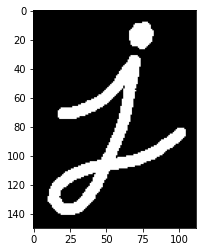

In [22]:
jmg = cv2.imread('images/j.png', 0)
plt.imshow(jmg, cmap='gray');

In [23]:
@interact_manual
def show_erosion_dilation(
    kernel_size = widgets.SelectionSlider(options=[2*j+1 for j in range(1, 11)],  value=5),
    iteration = widgets.IntSlider(value=1, min=1, max=10)):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    erosion = cv2.erode(jmg, kernel, iterations = iteration)
    dilation = cv2.dilate(jmg, kernel, iterations = iteration)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(jmg, cmap='gray')
    plt.title('Original')
    
    plt.subplot(1,3,2)
    plt.imshow(erosion, cmap='gray')
    plt.title('Erosion')
    
    plt.subplot(1,3,3)
    plt.imshow(dilation, cmap='gray')
    plt.title('Dilation')
    

interactive(children=(SelectionSlider(description='kernel_size', index=1, options=(3, 5, 7, 9, 11, 13, 15, 17,…

Try with your custom kernel...

## Other Morphological Filters

In [24]:
@interact_manual
def show_erosion_dilation(
    kernel_size = widgets.SelectionSlider(options=[2*j+1 for j in range(1, 11)],  value=5)):
    
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    plt.figure(figsize=(15, 20))
    plt.subplot(3, 4, 1)
    plt.imshow(jmg, cmap='gray')
    plt.title('Originial')

    for i, flt in enumerate(filter(lambda s: s.startswith('MORPH_'), dir(cv2))):
        mrph = cv2.morphologyEx(jmg, eval(f"cv2.{flt}"), kernel)
        plt.subplot(3, 4, i+2)
        plt.imshow(mrph, cmap='gray')
        plt.title(flt)

    plt.show()
    plt.close()

interactive(children=(SelectionSlider(description='kernel_size', index=1, options=(3, 5, 7, 9, 11, 13, 15, 17,…

# Image Gradients
find image gradients,   edges

[Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_gradients.html#doxid-d5-d0f-tutorial-py-gradients)


In [25]:
sudoku_1 = cv2.imread('images/sudoku-original.jpg',  0)
print(sudoku_1.shape)

@interact_manual
def show_erosion_dilation(
    kernel_size = widgets.SelectionSlider(options=[2*j+1 for j in range(1, 11)],  value=5)):
    
    laplacian = cv2.Laplacian(sudoku_1, cv2.CV_64F)
    sobelx = cv2.Sobel(sudoku_1, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(sudoku_1, cv2.CV_64F, 0, 1, ksize=kernel_size)

    plt.figure(figsize=(10, 10))
    plt.subplot(2,2,1),plt.imshow(sudoku_1, cmap = 'gray'), plt.colorbar()
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(laplacian, cmap = 'gray'), plt.colorbar()
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3),plt.imshow(sobelx, cmap = 'gray'), plt.colorbar()
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4),plt.imshow(sobely, cmap = 'gray'), plt.colorbar()
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

    plt.show()
    plt.close()

(423, 419)


interactive(children=(SelectionSlider(description='kernel_size', index=1, options=(3, 5, 7, 9, 11, 13, 15, 17,…

**One Important Matter!**

We usually use the 8-Bit datatype cv2.CV_8U or np.uint8 which can represent the values 0..255. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

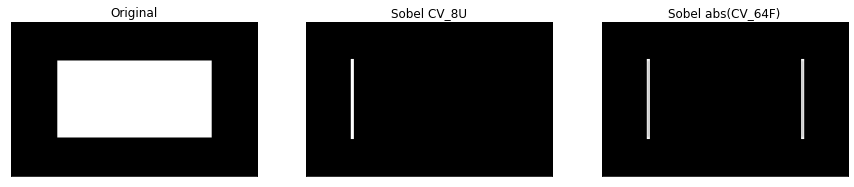

In [79]:
rect = np.uint8(np.zeros((200,  320)))
rect[50:150,  60:260] = 255

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(rect, cv2.CV_8U, 1, 0, ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(rect, cv2.CV_64F, 1, 0, ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1),plt.imshow(rect,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

# Sobel Edge Detection

https://en.wikipedia.org/wiki/Sobel_operator

The Sobel methods applies two convolution filters (actually a filter and its transpose) 

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/767a425adccc7f13b2fac6d42e5f7ccdd6cac288)

In [22]:
! ls images/

Plain-MnMs-Pile.jpg  Plain-MnMs-Pile2.jpg


array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

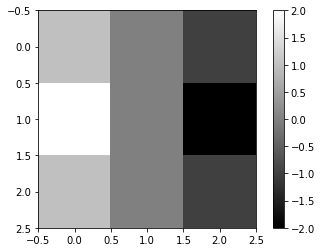

In [98]:
# original
sf = np.array([[ +1,   0,   -1],  
               [ +2,   0,   -2],  
               [ +1,   0,   -1]])

# # Let's use the Sobel-Feldman operator
# sf = np.array([[ +3,   0,    -3],  
#                [+10,   0,   -10],  
#                [ +3,   0,    -3]])


display(sf)
display(sf.T)
plt.imshow(sf,   cmap='gray')
plt.colorbar()
plt.show(); plt.close()

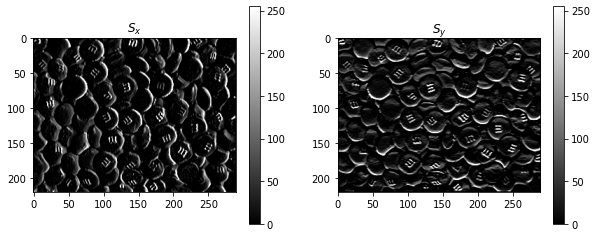

In [99]:
sx = cv2.filter2D(sudoku,   -1,   sf)
sy = cv2.filter2D(sudoku,   -1,   sf.T)

plt.figure(figsize=(10,  4))
plt.subplot(1,  2,  1)
plt.imshow(sx,   cmap='gray')
plt.title('$S_x$')
plt.colorbar()
plt.subplot(1,  2,  2)
plt.imshow(sy,   cmap='gray')
plt.title('$S_y$')
plt.colorbar()
plt.show(); plt.close()



Next step: squaring each element. We use the Hadamard product
https://stackoverflow.com/questions/40034993/how-to-get-element-wise-matrix-multiplication-hadamard-product-in-numpy

In [46]:
# Double check if the '*' operator really produces what we want
A = np.array(range(12)).reshape(4,  3)
display(A)
display(A*A)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121]])

In [48]:
display(np.sqrt(A*A))

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [50]:
display(A+A)

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [43]:
sx.shape,   (sx * sx).shape

((220, 290), (220, 290))

In [61]:
sx2 = sx * sx
sy2 = sy * sy
mag = np.sqrt((sx * sx) + (sy * sy))

In [63]:
np.roundmag.max()

15.81

In [114]:
mag.astype(np.uint8)

array([[ 0, 14, 15, ...,  8, 12,  0],
       [ 8,  0,  0, ..., 15, 14,  0],
       [ 0,  0,  0, ..., 12,  0,  0],
       ...,
       [ 0, 15,  4, ...,  8, 14,  0],
       [ 0, 13,  0, ...,  8,  0,  0],
       [ 0, 14, 12, ..., 10,  0,  0]], dtype=uint8)

In [123]:
mag_int.dtype=='uint8'

False

Next steps is Sobel

(220, 290)
max value: 15.8125 min value: 0.0 shape: (220, 290)


array([[255,   0,   0, ...,   0,   0, 255],
       [  0, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0, 255, 255],
       ...,
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0, 255, ...,   0, 255, 255],
       [255,   0,   0, ...,   0, 255, 255]], dtype=uint8)

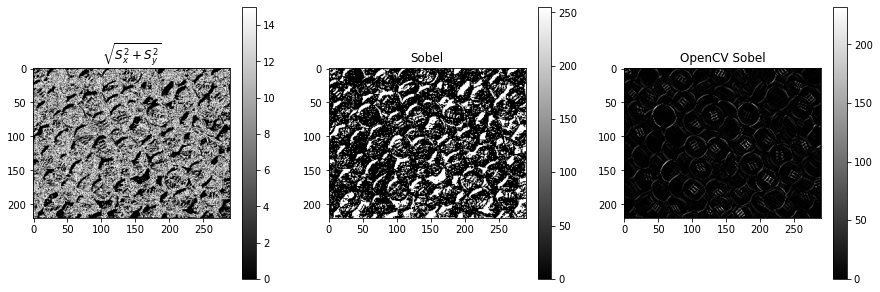

In [124]:

sx2 = sx * sx
sy2 = sy * sy
mag = np.sqrt((sx * sx) + (sy * sy))
print(mag.shape)

# Note: OpenCV doesn't work with an datatype. Matrix elements must be either of type 'uint8' or 'float32'
#       After numerical matrix operation we need to check that the resulting image is one of these types

if mag.dtype !='uint8':
    mag = mag.astype(np.uint8)

print(f"max value: {mag_int.max()} min value: {mag_int.min()} shape: {mag_int.shape}")

# display(mag)
plt.figure(figsize=(15,  5))
plt.subplot(1,  3,  1)
plt.imshow(mag,   cmap='gray')
plt.title('$\sqrt{S_x^2 + S_y^2}$')
plt.colorbar()

thresh = 1

# sob =  (mag < thresh)  
ret,   sob = cv2.threshold(mag,   thresh,   255,   cv2.THRESH_BINARY_INV)
display(sob)
plt.subplot(1,  3,  2)
plt.imshow(sob,   cmap='gray')
plt.title('Sobel')
plt.colorbar()

### OpenCV implementation
sob2 = cv2.Sobel(sudoku,   -1,   1,   1,   )

plt.subplot(1,  3,  3)
plt.imshow(sob2,   cmap='gray')
plt.title('OpenCV Sobel')
plt.colorbar()
plt.show(); plt.close()

## OpenCV Sobel
`Sobel(...)` calculates the first,   second,   third,   or mixed image derivatives using an extended Sobel operator.

    ```Sobel(src,   ddepth,   dx,   dy[,   dst[,   ksize[,   scale[,   delta[,   borderType]]]]]) -> dst```
    
In all cases except one,   the $\texttt{ksize} \times \texttt{ksize}$ separable kernel is used to
calculate the derivative. When $\texttt{ksize = 1}$,   the $3 \times 1$ or $1 \times 3$
kernel is used (that is,   no Gaussian smoothing is done). `ksize = 1` can only be used for the first
or the second x- or y- derivatives.

There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the $3\times3$ Scharr
filter that may give more accurate results than the $3\times3$ Sobel. The Scharr aperture is

```
[[  3,     0,    -3],  
 [ 10,     0,   -10],  
 [  3,     0,    -3]]
```

for the x-derivative,   or transposed for the y-derivative.

The function calculates an image derivative by convolving the image with the appropriate kernel:

$\texttt{dst} =  rac{\partial^{xorder+yorder} \texttt{src}}{\partial x^{xorder} \partial y^{yorder}}$

The Sobel operators combine Gaussian smoothing and differentiation,   so the result is more or less
resistant to the noise. Most often,   the function is called with ( xorder = 1,   yorder = 0,   ksize = 3)
or ( xorder = 0,   yorder = 1,   ksize = 3) to calculate the first x- or y- image derivative. The first
case corresponds to a kernel of:

```
[[ 1,     0,   -1],  
 [ 2,     0,   -2],  
 [ 1,     0,   -1]]
```



The second case corresponds to a kernel of:
```
[[  1,    2,    1],  
 [  0,    0,    0],  
 [ -1,   -2,   -1]]
```

**Parameters:**

- src input image.
- dst output image of the same size and the same number of channels as src .
- ddepth output image depth,   see @ref filter_depths "combinations"; in the case of
    8-bit input images it will result in truncated derivatives.
- dx order of the derivative x.
- dy order of the derivative y.
- ksize size of the extended Sobel kernel; it must be 1,   3,   5,   or 7.
- scale optional scale factor for the computed derivative values; by default,   no scaling is applied (see #getDerivKernels for details).
- delta optional delta value that is added to the results prior to storing them in dst.
- borderType pixel extrapolation method,   see #BorderTypes. #BORDER_WRAP is not supported.


**See also**  Scharr,   Laplacian,   sepFilter2D,   filter2D,   GaussianBlur,   cartToPolar


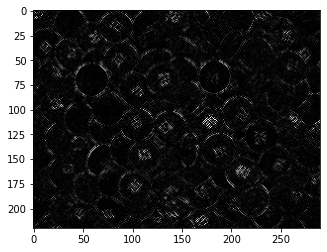

In [126]:
sob2 = cv2.Sobel(sudoku,   -1,   2,   2,   7 )
plt.imshow(sob2,   cmap='gray')

In [128]:
print(f"Possible 'borderType' values: {',   '.join(filter(lambda s: s.startswith('BORDER_'),   dir(cv2)))}")

Possible 'borderType' values: BORDER_CONSTANT, BORDER_DEFAULT, BORDER_ISOLATED, BORDER_REFLECT, BORDER_REFLECT101, BORDER_REFLECT_101, BORDER_REPLICATE, BORDER_TRANSPARENT, BORDER_WRAP


# Canny Edge Detection
find edges with Canny Edge Detection [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_canny.html#doxid-da-d22-tutorial-py-canny)


# Contours
[Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_table_of_contents_contours.html#doxid-d3-d05-tutorial-py-table-of-contents-contours)

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
Since OpenCV 3.2, findContours() no longer modifies the source image but returns a modified image as the first of three return parameters.
In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.
Let’s see how to find contours of a binary image:

`findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy`

The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
OpenCV sample directory.

**Note:** Since opencv 3.2 source image is not modified by this function.

- `image` Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold , #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one. If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
- `contours` Detected contours. Each contour is stored as a vector of points (e.g. std::vector<std::vector<cv::Point> >).
- `hierarchy` Optional output vector (e.g. std::vector<cv::Vec4i>), containing information about the image topology. It has as many elements as the number of contours. For each i-th contour contours[i], the elements hierarchy[i][0] , hierarchy[i][1] , hierarchy[i][2] , and hierarchy[i][3] are set to 0-based indices in contours of the next and previous contours at the same hierarchical level, the first child contour and the parent contour, respectively. If for the contour i there are no next, previous, parent, or nested contours, the corresponding elements of hierarchy[i] will be negative.
- `mode` Contour retrieval mode, see #RetrievalModes
- `method` Contour approximation method, see #ContourApproximationModes
- `offset` Optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.

In [83]:
rect = np.uint8(np.zeros((200,  320)))
rect[50:150,  60:260] = 255

ret, thresh = cv2.threshold(rect, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [85]:
contours[:3]

[array([[[ 60,  50]],
 
        [[ 60, 149]],
 
        [[259, 149]],
 
        [[259,  50]]], dtype=int32)]

In [86]:
hierarchy

array([[[-1, -1, -1, -1]]], dtype=int32)

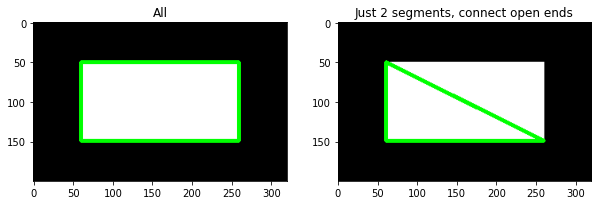

In [101]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(
    cv2.drawContours(
        cv2.cvtColor(rect, cv2.COLOR_GRAY2RGB),
        contours, -1, (0, 255, 0), 3)
)
plt.title('All')

plt.subplot(1,2,2)
cnt = contours[0]

plt.imshow(
    cv2.drawContours(
        cv2.cvtColor(rect, cv2.COLOR_GRAY2RGB),
        [cnt[:3]], 0, (0, 255, 0), 3)
)
plt.title('Just 2 segments, connect open ends')

plt.show()
plt.close()

There are a number of contour approximation methods (for the 3rd argument in `cv.findContours()`)

In [104]:
print(f"Contour Approximation Methods: {', '.join(filter(lambda s: s.startswith('CHAIN_'), dir(cv2)))}")

Contour Approximation Methods: CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE, CHAIN_APPROX_TC89_KCOS, CHAIN_APPROX_TC89_L1


## Some Metrics
https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_contour_properties.html#doxid-d1-d32-tutorial-py-contour-properties

In [108]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print(f"Aspect Ratio: {aspect_ratio}")

area = cv2.contourArea(cnt)
print(f"Area: {area}")

rect_area = w*h
extent = float(area)/rect_area
print(f"Extent: {extent}")

area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print(f"Solidity: {solidity}")

Aspect Ratio: 2.0
Area: 19701.0
Extent: 0.98505
Solidity: 1.0


## More Functions

### Convexity Defects

We saw what is convex hull in second chapter about contours. Any deviation of the object from this hull can be considered as convexity defect.

OpenCV comes with a ready-made function to find this, cv2.convexityDefects(). A basic function call would look like below:

    hull = cv2.convexHull(cnt,returnPoints = False)
    defects = cv2.convexityDefects(cnt,hull)

Remember we have to pass returnPoints = False while finding convex hull, in order to find convexity defects.

It returns an array where each row contains these values - [ start point, end point, farthest point, approximate distance to farthest point ]. We can visualize it using an image. We draw a line joining start point and end point, then draw a circle at the farthest point. Remember first three values returned are indices of cnt. So we have to bring those values from cnt.

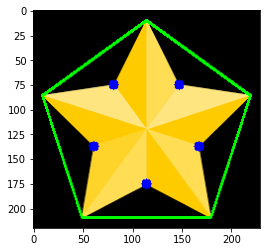

(None, None)

In [119]:
img = cv2.cvtColor(cv2.imread('images/star.png'), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(img_gray, 127, 255,0)
contours, hierarchy = cv2.findContours(thresh, 2, 1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

plt.imshow(img)
plt.show(), plt.close()

### Point Polygon Test

This function finds the shortest distance between a point in the image and a contour. It returns the distance which is negative when point is outside the contour, positive when point is inside and zero if point is on the contour.

For example, we can check the point (50,50) as follows:

    dist = cv2.pointPolygonTest(cnt,(50,50),True)
In the function, third argument is measureDist. If it is True, it finds the signed distance. If False, it finds whether the point is inside or outside or on the contour (it returns +1, -1, 0 respectively).

If you don’t want to find the distance, make sure third argument is False, because, it is a time consuming process. So, making it False gives about 2-3X speedup.

### Match Shapes

OpenCV comes with a function cv2.matchShapes() which enables us to compare two shapes, or two contours and returns a metric showing the similarity. The lower the result, the better match it is. It is calculated based on the hu-moment values. Different measurement methods are explained in the docs.

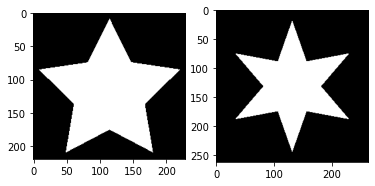

Match (the closer to 0 to better): 0.05316615572864514


In [131]:
img1 = cv2.imread('images/star.png',0)
img2 = cv2.imread('images/star2.png',0)

plt.subplot(1,2,1)
plt.imshow(thresh, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(thresh2, cmap='gray')
plt.show()
plt.close()

ret, thresh = cv2.threshold(img1, 127, 255,  cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY_INV)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt1 = contours[0]

contours,hierarchy = cv2.findContours(thresh2,2,1)
cnt2 = contours[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print(f"Match (the closer to 0 to better): {ret}")

# Hough Transform

The Hough transform is a feature extraction technique used in image analysis,   computer vision,   and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure. This voting procedure is carried out in a parameter space,   from which object candidates are obtained as local maxima in a so-called accumulator space that is explicitly constructed by the algorithm for computing the Hough transform.

The classical Hough transform was concerned with the identification of lines in the image,   but later the Hough transform has been extended to identifying positions of arbitrary shapes,   most commonly circles or ellipses. The Hough transform as it is universally used today was invented by Richard Duda and Peter Hart in 1972,   who called it a "generalized Hough transform" after the related 1962 patent of Paul Hough. The transform was popularized in the computer vision community by Dana H. Ballard through a 1981 journal article titled "Generalizing the Hough transform to detect arbitrary shapes".

References:
- https://en.wikipedia.org/wiki/Hough_transform
- https://en.wikipedia.org/wiki/Generalised_Hough_transform
- https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghlines.html#doxid-d6-d10-tutorial-py-houghlines
- https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghcircles.html#doxid-da-d53-tutorial-py-houghcircles

## Hough Line Transform

detect lines in an image [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghlines.html#doxid-d6-d10-tutorial-py-houghlines)


## Hough Circle Transform
detect circles in an image [Link to OpenCV tutorial](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghcircles.html#doxid-da-d53-tutorial-py-houghcircles)

Size of image: (440, 580, 3) Number of pixels: 255,200


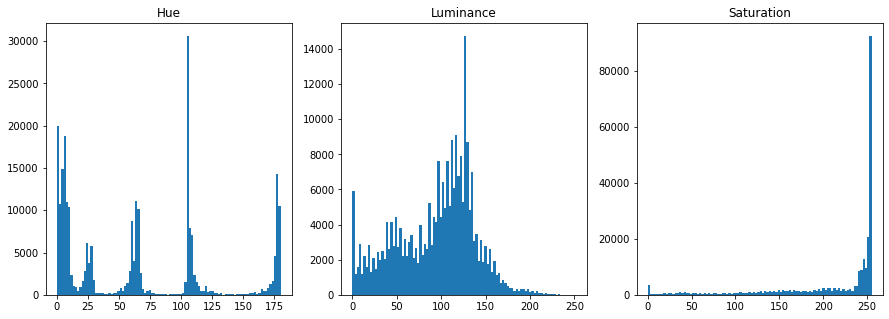

In [27]:
hls = cv2.cvtColor(cv2.imread('images/Plain-MnMs-Pile.jpg'),   cv2.COLOR_BGR2HLS)
hls = cv2.resize(hls,   (580,   440))
n = hls.shape[0]*hls.shape[1]
print(f"Size of image: {hls.shape} Number of pixels: {n:,}")

plt.figure(figsize=(15,  5))
plt.subplot(1,  3,  1)
plt.hist(hls[:,  :,  0].reshape(n),   bins=100)
plt.title("Hue")
plt.subplot(1,  3,  2)
plt.hist(hls[:,  :,  1].reshape(n),   bins=100)
plt.title("Luminance")
plt.subplot(1,  3,  3)
plt.hist(hls[:,  :,  2].reshape(n),   bins=100)
plt.title("Saturation")
plt.show(); plt.close()


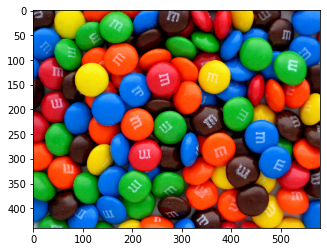

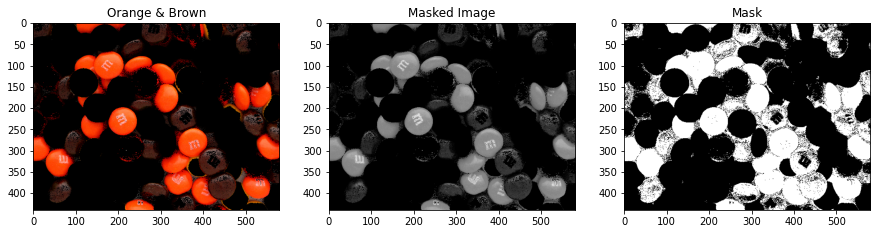

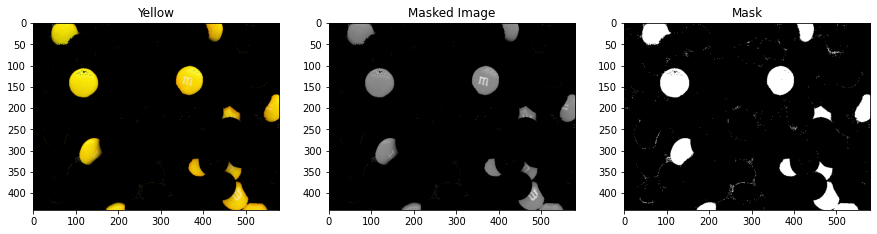

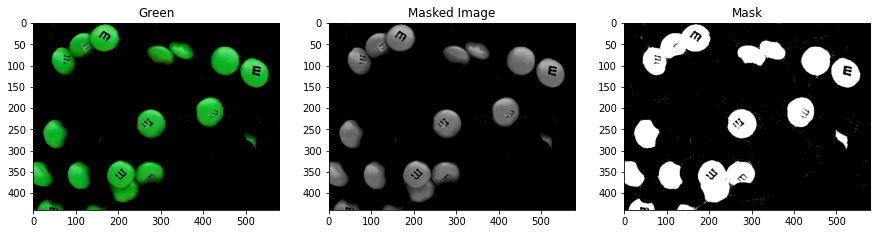

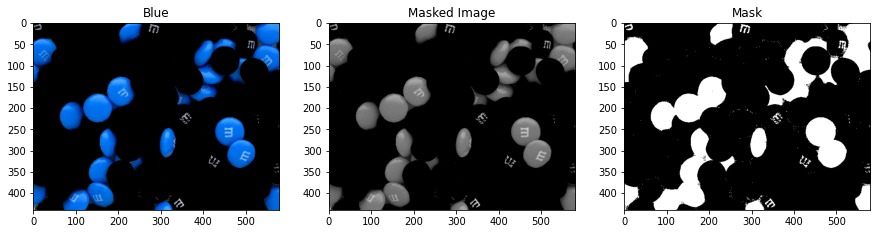

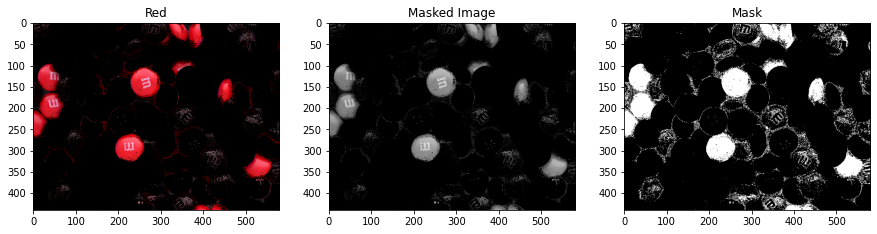

In [28]:
plt.imshow(cv2.cvtColor(hls,   cv2.COLOR_HLS2RGB))
plt.show(); plt.close()

colors = [(0,   17,   'Orange & Brown'),   (19,   30,   'Yellow'),   (45,   70,   'Green'),   (100,   125,   'Blue'),   (160,   180,   'Red')]

mm_mask = {}
mm_sudoku = {}

for j,   sep in enumerate(colors):
    mask = (hls[:,  :,  0]>=sep[0]) & (hls[:,  :,  0]<=sep[1])
    tmp1 = hls.copy()
    tmp1[~mask[:,  :],   1] = 0
    tmp1[~mask[:,  :],   2] = 0
    plt.figure(figsize=(15,   5))
    plt.subplot(1,  3,  1)
    plt.imshow(cv2.cvtColor(tmp1,   cv2.COLOR_HLS2RGB))
    plt.title(sep[2])
    
    plt.subplot(1,  3,  2)
    tmp2 = hls[:,  :,  1].copy()
    tmp2[~mask[:,  :]] = 0
    plt.imshow(tmp2,   cmap='gray')
    plt.title("Masked Image")
    
    plt.subplot(1,  3,  3)
    plt.imshow(mask,   cmap='gray')
    plt.title("Mask")
    
    plt.show(); plt.close()
    mm_mask[sep[2]] = mask
    mm_sudoku[sep[2]] = tmp2

### Demo

https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_houghcircles.html#doxid-da-d53-tutorial-py-houghcircles

    
    HoughCircles(image,   method,   dp,   minDist[,   circles[,   param1[,   param2[,   minRadius[,   maxRadius]]]]]) -> circles

Finds circles in a grayscale image using the Hough transform.
The function finds circles in a grayscale image using a modification of the Hough transform.

**Note:**

Usually the function detects the centers of circles well. However,   it may fail to find correct
radii. You can assist to the function by specifying the radius range ( minRadius and maxRadius ) if
you know it. Or,   in the case of #HOUGH_GRADIENT method you may set maxRadius to a negative number
to return centers only without radius search,   and find the correct radius using an additional procedure.

It also helps to smooth image a bit unless it's already soft. For example,  
GaussianBlur() with 7x7 kernel and 1.5x1.5 sigma or similar blurring may help.

**Parameters:**

- `image` 8-bit,   single-channel,   grayscale input image.
- `circles` Output vector of found circles. Each vector is encoded as  3 or 4 element
floating-point vector $(x,   y,   radius)$ or $(x,   y,   radius,   votes)$ .
- `method` Detection method,   see #HoughModes. The available methods are #HOUGH_GRADIENT and #HOUGH_GRADIENT_ALT.
- `dp` Inverse ratio of the accumulator resolution to the image resolution. For example,   if
dp=1 ,   the accumulator has the same resolution as the input image. If dp=2 ,   the accumulator has
half as big width and height. For #HOUGH_GRADIENT_ALT the recommended value is dp=1.5,  
unless some small very circles need to be detected.
- `minDist` Minimum distance between the centers of the detected circles. If the parameter is
too small,   multiple neighbor circles may be falsely detected in addition to a true one. If it is
too large,   some circles may be missed.
- `param1` First method-specific parameter. In case of #HOUGH_GRADIENT and #HOUGH_GRADIENT_ALT,  
it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller).
Note that #HOUGH_GRADIENT_ALT uses #Scharr algorithm to compute image derivatives,   so the threshold value
shough normally be higher,   such as 300 or normally exposed and contrasty images.
- `param2` Second method-specific parameter. In case of #HOUGH_GRADIENT,   it is the
accumulator threshold for the circle centers at the detection stage. The smaller it is,   the more
false circles may be detected. Circles,   corresponding to the larger accumulator values,   will be
returned first. In the case of #HOUGH_GRADIENT_ALT algorithm,   this is the circle "perfectness" measure.
The closer it to 1,   the better shaped circles algorithm selects. In most cases 0.9 should be fine.
If you want get better detection of small circles,   you may decrease it to 0.85,   0.8 or even less.
But then also try to limit the search range [minRadius,   maxRadius] to avoid many false circles.
- `minRadius` Minimum circle radius.
- `maxRadius` Maximum circle radius. If <= 0,   uses the maximum image dimension. If < 0,   #HOUGH_GRADIENT returns
centers without finding the radius. #HOUGH_GRADIENT_ALT always computes circle radiuses.

**See also:** `fitEllipse`,   `minEnclosingCircle`

In [30]:
# Pick green M&Ms
gray = mm_sudoku['Green']

# Let's use some default parameters...
# circles = cv2.HoughCircles(gray,   cv2.HOUGH_GRADIENT,   1,   20,  
#                             param1=50,   param2=30,   minRadius=0,   maxRadius=0)

# What about limiting the range of allowed radii?
circles = cv2.HoughCircles(gray,   cv2.HOUGH_GRADIENT,   1,   20,  
                            param1=50,   param2=30,   minRadius=20,   maxRadius=80)
print(f"Number of circles found: {circles.shape[1]:,}")

Number of circles found: 14


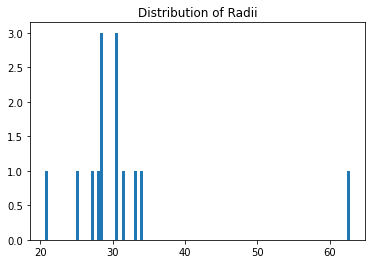

In [31]:
radii = circles[0,   :,   2]
plt.hist(radii,   bins=100)
plt.title("Distribution of Radii")
plt.show(); plt.close()

Text(0.5, 1.0, 'Hough Circles')

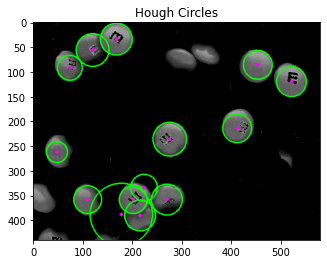

In [32]:
# Show circles
csudoku = cv2.cvtColor(gray,   cv2.COLOR_GRAY2RGB)
circles = np.uint16(np.around(circles))
for i in circles[0,  :]:
    # draw the outer circle
    cv2.circle(csudoku,  (i[0],  i[1]),  i[2],  (0,  255,  0),  2)
    # draw the center of the circle
    cv2.circle(csudoku,  (i[0],  i[1]),  2,  (255,  0,  255),  3)

plt.imshow(csudoku)
plt.title("Hough Circles")

Wow! That's alot... It looks like we can form circles that are much larger than the M&Ms. **Let's go back an limit to smaller circles.**

# Exercise 1 - Convolution

Experiment with custom convolution filters. You may start out with some very basic images that you create yourself. Then use the M&M image,   or download more images.

1. Try different convolution filters from scratch
2. Can you recreate Gaussian blur,   sharpeing,   denoising,   etc?
3. Use the corresponding OpenCV functions to compare results

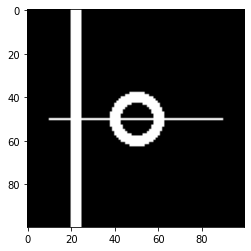

In [137]:
pic1 = np.zeros((100,   100),   dtype=np.uint8)
pic1[:,   20:25] = 255                           # create a vertical bar
pic1[50,   10:90] = 255                          # create a horizontal line
pic1 = cv2.circle(pic1,   (50,   50),   10,   255,   3)  # draw a circle
plt.imshow(pic1,   cmap='gray')
plt.show(); plt.close()

(100, 100)


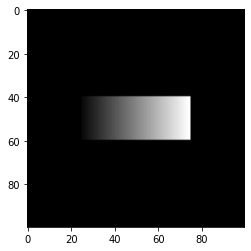

In [147]:
pic2 = np.zeros((100,   100),   dtype=np.uint8)
z = np.zeros((20,   50),   dtype=np.uint8)
v = np.array(range(50))*5 + 10
pic2[40:60,   25:75]= np.uint8(z+v)
print(pic2.shape)
plt.imshow(pic2,   cmap='gray')
plt.show(); plt.close()

# Exercise 2 - Edge Detection

Compare Sobel `cv2.Sobel()` and Canny `cv2.Canny()` edge detection algorithms.
Just like for the previous exercise,   create some simple images to understand the operations.

Reference: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_canny.html#doxid-da-d22-tutorial-py-canny


# Exercise 3 - Contours

Again,   blue M&M are special. Can you draw contours around the blue M&Ms?

<sudoku src="https://upload.wikimedia.org/wikipedia/commons/e/e5/Plain-M%26Ms-Pile.jpg" width="290px" height="220px">

Reference: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_table_of_contents_contours.html

# Exercise 4 - Hough Transfrom

How many M&Ms of all colors are in the image? we can start out identifying the ones that are face up and form a circle. However,   what about those lying in an angle. It's possible to apply a Generalized Hough Transform on elliptical shapes,   but that would also increase the complexity from 3 to 5 parameters.

There are couple of approaches that can be tried:
- Use Hough Circles,   even with partial arcs that are part of an ellipse
- Stretch and rotate the image in different directions that would then reshape ellipses into circles
- scikit image offers an approach https://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html

Also consider `cv2.fitEllipse`,   `cv2.fitEllipseAMS`,   and `cv2.fitEllipseDirect`